In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

In [1]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

import seaborn as sns

import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해
# np.random.seed(42)

## 회귀

### 규제

#### Ridge - L2 정규화

In [7]:
np.random.seed(42)
m = 20 
X = 3 * np.random.rand(20, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)/ 1.5

# 확률적 경사 하강법을 이용한 구현
# max_iter 은 최대 반복횟수
# eta0는 학습률
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = 'l2', alpha = 0.1/m,
                      max_iter = 1000, eta0 = 0.01, random_state = 42)

sgd_reg.fit(X, y)
print(sgd_reg.predict([[1.5]]))

# Ridge를 이용한 구현
from sklearn.linear_model import Ridge

sgd_reg = Ridge(alpha = 0.1/m, random_state = 42)

sgd_reg.fit(X, y)
print(sgd_reg.predict([[1.5]]))

[1.469]
[[1.554]]


### 보스턴 주택 가격 데이터에 Ridge를 적용

In [10]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
#공백 문자 단위로 데이터를 분할해서 읽을
#공백 문자가 \s 이고 +를 추가한 이유는 맨 앞에 공백이 있으면 제거하기 위해서
#뒤의 3개의 데이터도 하나의 행에 포함이 되어야 하는데 뒷줄로 넘어감
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
print(raw_df.head())

        0      1      2    3      4      5     6      7    8      9     10
0    0.006  18.00   2.31  0.0  0.538  6.575  65.2  4.090  1.0  296.0  15.3
1  396.900   4.98  24.00  NaN    NaN    NaN   NaN    NaN  NaN    NaN   NaN
2    0.027   0.00   7.07  0.0  0.469  6.421  78.9  4.967  2.0  242.0  17.8
3  396.900   9.14  21.60  NaN    NaN    NaN   NaN    NaN  NaN    NaN   NaN
4    0.027   0.00   7.07  0.0  0.469  7.185  61.1  4.967  2.0  242.0  17.8


In [12]:
#짝수 행의 2개의 열을 홀수 행에 붙이기
#피처 만들기
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#타겟 만들기
target = raw_df.values[1::2, 2]

In [13]:
bostonDF = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX",
                                      "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO",
                                      "B", "LSTAT"])
bostonDF["PRICE"] = target
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [21]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis =1 )

# 사용할 알파 값의 리스트를 생성
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha, random_state = 42)
    
    # 교차 검증
    from sklearn.model_selection import cross_val_score
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,
                                    scoring = 'neg_mean_squared_error',
                                    cv = 5)
    
    # 스코어의 평균
    avg_mean = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha 가 {0}일 때 평균 RMSE : {1}'.format(alpha, avg_mean))

alpha 가 0일 때 평균 RMSE : 5.828658946215806
alpha 가 0.1일 때 평균 RMSE : 5.788486627032412
alpha 가 1일 때 평균 RMSE : 5.652570965613549
alpha 가 10일 때 평균 RMSE : 5.518166280868973
alpha 가 100일 때 평균 RMSE : 5.329589628472148


In [19]:
# 회귀 계수 확인
# 회귀 계수는 알파가 클수록 줄어들지만 0이 되지는 않습니다.

for alpha in alphas :
    ridge = Ridge(alpha = alpha,  random_state = 42)
    ridge.fit(X_data, y_target)
    print(ridge.coef_)

[-1.080e-01  4.642e-02  2.056e-02  2.687e+00 -1.777e+01  3.810e+00
  6.922e-04 -1.476e+00  3.060e-01 -1.233e-02 -9.527e-01  9.312e-03
 -5.248e-01]
[-1.075e-01  4.657e-02  1.600e-02  2.670e+00 -1.668e+01  3.818e+00
 -2.691e-04 -1.460e+00  3.035e-01 -1.242e-02 -9.408e-01  9.368e-03
 -5.260e-01]
[-1.046e-01  4.744e-02 -8.805e-03  2.552e+00 -1.078e+01  3.854e+00
 -5.415e-03 -1.373e+00  2.901e-01 -1.291e-02 -8.761e-01  9.673e-03
 -5.333e-01]
[-0.101  0.05  -0.043  1.952 -2.372  3.702 -0.011 -1.249  0.28  -0.014
 -0.798  0.01  -0.559]
[-1.022e-01  5.450e-02 -5.283e-02  6.383e-01 -2.628e-01  2.335e+00
  1.212e-03 -1.153e+00  3.154e-01 -1.586e-02 -8.292e-01  9.393e-03
 -6.608e-01]


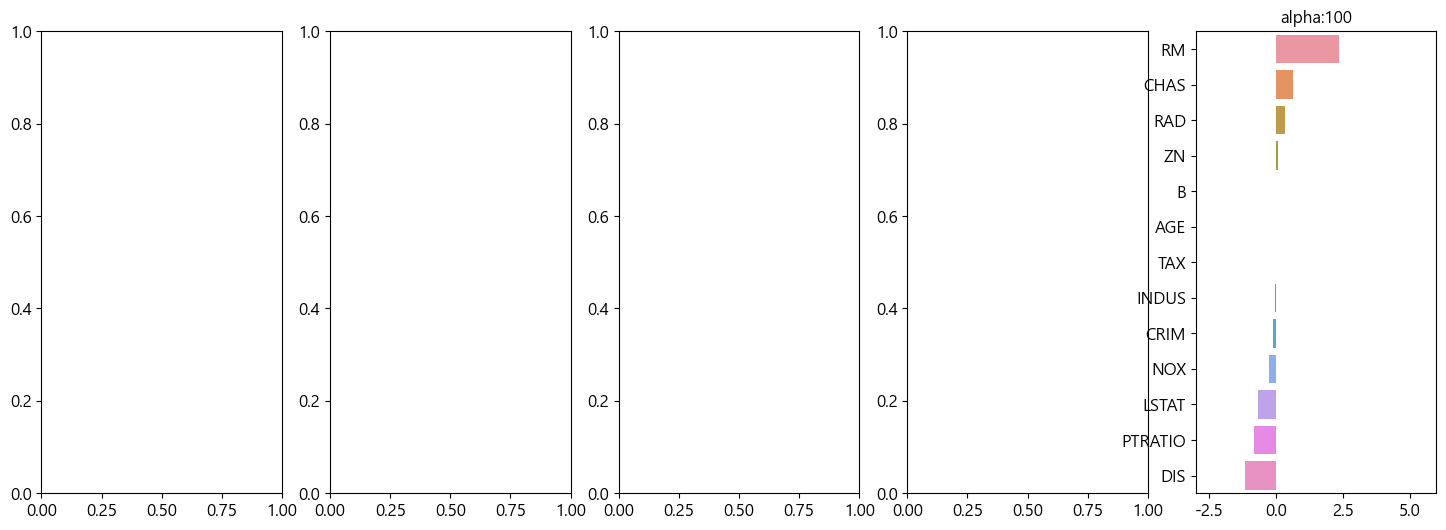

In [27]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)

# alpha에 따른 피처별 회귀 계수를 DataFrame의 컬럼으로 추가.
coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
colname='alpha:'+str(alpha)
coeff_df[colname] = coeff

# 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
coeff = coeff.sort_values(ascending=False)
axs[pos].set_title(colname)
axs[pos].set_xlim(-3,6)
sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()

#### Lasso -  L1 정규화

In [23]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis =1 )

# 사용할 알파 값의 리스트를 생성
alphas = [0, 0.1, 1, 10, 100]

from sklearn.linear_model import Lasso

for alpha in alphas :
    lasso = Lasso(alpha = alpha, random_state = 42)
    
    # 교차 검증
    from sklearn.model_selection import cross_val_score
    neg_mse_scores = cross_val_score(lasso, X_data, y_target,
                                    scoring = 'neg_mean_squared_error',
                                    cv = 5)
    
    # 스코어의 평균
    avg_mean = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha 가 {0}일 때 평균 RMSE : {1}'.format(alpha, avg_mean))

alpha 가 0일 때 평균 RMSE : 5.828658946215802
alpha 가 0.1일 때 평균 RMSE : 5.615116035266936
alpha 가 1일 때 평균 RMSE : 5.776020813823376
alpha 가 10일 때 평균 RMSE : 6.585731788106536
alpha 가 100일 때 평균 RMSE : 8.393274554563755


In [24]:
# 회귀 계수 확인
# 회귀 계수는 알파가 클수록 덜 중요한 것들은 0이 됩니다.

for alpha in alphas :
    lasso = Lasso(alpha = alpha,  random_state = 42)
    lasso.fit(X_data, y_target)
    print(lasso.coef_)

[-1.080e-01  4.642e-02  2.056e-02  2.687e+00 -1.777e+01  3.810e+00
  6.922e-04 -1.476e+00  3.060e-01 -1.233e-02 -9.527e-01  9.312e-03
 -5.248e-01]
[-0.098  0.049 -0.037  0.955 -0.     3.703 -0.01  -1.161  0.275 -0.015
 -0.771  0.01  -0.569]
[-0.063  0.049 -0.     0.    -0.     0.95   0.021 -0.669  0.264 -0.015
 -0.723  0.008 -0.761]
[-0.     0.026 -0.     0.     0.     0.     0.    -0.     0.    -0.009
 -0.     0.007 -0.564]
[-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.    -0.021
 -0.     0.004 -0.   ]


#### Elasticnet

In [30]:
from sklearn.linear_model import ElasticNet

sgd_reg = ElasticNet(alpha = 0.1/m, l1_ratio = 0.7,  random_state = 42)
sgd_reg.fit(X, y)
print(sgd_reg.predict([[1.5]]))

[1.553]


## KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis =1 )

#가중 평균 적용
regressor = KNeighborsRegressor(n_neighbors = 3, weights = 'distance')
regressor.fit(X_data, y_target)

# print(X_data.head())
# print(X_data.loc[0])
# print(X_data.loc[0].values)
# print(X_data.loc[0].values.reshape(13,1))
print(regressor.predict(X_data.loc[0].values.reshape(1, 13)))
print(y_target.loc[0])

[24.]
24.0


## Decsion Tree

### API 사용

In [43]:
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(m, 1)/10

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [44]:
# 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

# decision_tree_dot이라는 파일로 저장
export_graphviz(tree_reg, out_file = 'decision_tree.dot',
               feature_names =['X'], class_names = ['y'],
               rounded = True, filled = True)

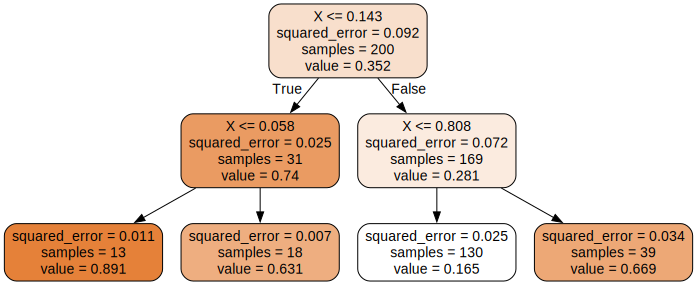

In [45]:
# 파일로 출력
with open('decision_tree.dot') as f :
    dot_graph = f.read()
    
src = Source(dot_graph)
src

In [46]:
print(tree_reg.feature_importances_)

[1.]


In [49]:
tree_reg = DecisionTreeRegressor(max_depth = 12 , random_state = 42)
tree_reg.fit(X_data, y_target)
print(X_data.columns)
# 피쳐의 중요도 6번째('RM'), 13번째 ('LSTAT')가 제일 중요
print(tree_reg.feature_importances_)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
[0.071 0.001 0.004 0.001 0.026 0.576 0.013 0.072 0.001 0.012 0.021 0.006
 0.195]


In [ ]:
# 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

# decision_tree_dot이라는 파일로 저장
export_graphviz(tree_reg, out_file = 'decision_tree.dot',
               feature_names =['X'], class_names = ['y'],
               rounded = True, filled = True)

## SVM - 선형

In [60]:
# 데이터 생성
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1))

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

# 선형 SVM 생성 및 훈련
from sklearn.svm import LinearSVR
# epsilon 은 결정 경계의 폭 - 이 안에 데이터를 배치
# 이 값이 작을수록 훈련 데이터에 정확해지고 클수록 훈련 데이터와 잘 맞지 않게 됩니다.
epsilons = [0.1, 0.5, 1.0, 1.5, 2.0]

for epsilon in epsilons :
    svm_reg = LinearSVR(epsilon = epsilon, random_state = 42)
    svm_reg.fit(X_train, y_train)

    # 예측
    y_pred = svm_reg.predict(X_test)
    # print(y_pred)
    from sklearn.metrics import mean_squared_error

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(epsilon, ':', rmse)
    
# 0.5까지는 작아졌는데, 그 이후론 커졌다! 즉 0.5를 사용하는 것이 좋다!

0.1 : 0.775374300708636
0.5 : 0.7631717017333474
1.0 : 0.7932297588481433
1.5 : 0.9299366061913275
2.0 : 1.238665524020453


## 투표기반 분류기

### 직접 투표 방식

In [62]:
# 사용할 데이터 생성
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [65]:
# 분류기 생성

# 개별 분류기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

log_clf = LogisticRegression(solver = 'lbfgs', random_state = 42)
svm_clf = SVC(gamma = 'scale', random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# 직접 투표 기반 분류기
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('svc', svm_clf), ('rf', rnd_clf)],
    voting = 'hard'
)

# 평가 지표 확인
from sklearn.metrics import accuracy_score

for clf in (log_clf, svm_clf, rnd_clf, voting_clf) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
SVC 0.896
RandomForestClassifier 0.896
VotingClassifier 0.912


### 간접 투표 방식

In [69]:
# 확률을 가지로 계산을 해서 분류
# 모든 예측기가 predict_proba()를 호출할 수 있어야 합니다.
# SVM 은 기본적으로 predict_proba()를 가지고 있지만 사용을 못합
# 인스턴스를 만들때 probability = True 를 추가해 확률을 구해야 함
svm_clf = SVC(gamma = "scale", probability = True, random_state= 42)

In [70]:
# 간접 투표 기반 분류기
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('svc', svm_clf), ('rf', rnd_clf)],
    voting = 'soft'
)

# 평가 지표 확인
from sklearn.metrics import accuracy_score

for clf in (log_clf, svm_clf, rnd_clf, voting_clf) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.864
SVC 0.896
RandomForestClassifier 0.896
VotingClassifier 0.92


## Bagging과 Pasting

### 트리모델과 트리 의 배깅 모델을 비교

In [71]:
# 사용할 데이터 생성
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [72]:
# 결정 트리 모델의 정확도
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.856


In [76]:
from sklearn.ensemble import BaggingClassifier

# 결정 트리를 500개 생성
#각 트리의 샘플 데이터 개수는 최대 100개이고 복원 추출을 수행

bag_clf = BaggingClassifier(DecisionTreeClassifier(), random_state = 42,
                           n_estimators = 500, max_samples = 100,
                           bootstrap = True)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.904


In [ ]:
# 앙상블의 예측이 결정 트리 하나의 예측 보다 일반화가 잘 됨
# 앙상블은 비슷한 편향을 가지지만 더 작은 분산을 만듬

### oob 평가

In [77]:
# 테스트 데이터를 별도로 생성하지 않고 훈련에 사용하지 않은 데이터를 이용해서 검증
bag_clf = BaggingClassifier(DecisionTreeClassifier(), random_state = 42,
                           n_estimators = 500, max_samples = 100,
                           bootstrap = True, oob_score = True)
bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)

0.9253333333333333


## RandomForest

### RandomForest 와 Decision Tree의 배깅

In [79]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features = 'sqrt',
                                              max_leaf_nodes = 16),
                           n_estimators = 500, random_state = 42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 500,
                                max_leaf_nodes = 16,
                                random_state = 42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [81]:
# 양쪽이 모두 일치하면 1.0 
print(np.sum(y_pred == y_pred_rf)/len(y_pred))

1.0


### iris 데이터의 예측에서 특성 중요도 확인

In [82]:
from sklearn.datasets import load_iris
iris = load_iris()

# iri 데이터 

rnd_clf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_) :
    print(name, score)


sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


## MNIST 데이터의 특성 중요도 시각화

In [84]:
from sklearn.datasets import fetch_openml

# 28*28 짜리 이미지 가져오기
# 특성의 개수가 784개
mnist = fetch_openml('mnist_784', version = 1)

# 타겟을 정수로 변환
mnist.target = mnist.target.astype(np.uint8)

In [85]:
rnd_clf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rnd_clf.fit(mnist.data, mnist['target'])

RandomForestClassifier(n_estimators=500, random_state=42)

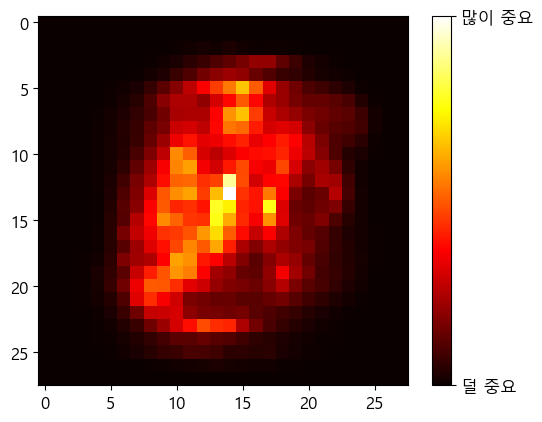

In [87]:
# 이미지 출력하는 함수
def plot_digit(data) :
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.hot, interpolation = 'nearest')
    
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks =[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['덜 중요', '많이 중요'])
plt.show()

# 이미지의 외곽부분은 분류에 미치는 효과가 거의 없고, 
# 중앙 부분의 데이터가 이미지 분류에 영향을 많이 주므로 
# 이 이미지는 가운데 부분만 잘라서 학습을 해도 무방합니다. 
# 이런 경우 이미지를 자르면 피쳐의 수가 줄어서 학습 시간도 줄고,
# 예측을 할 때 일반화 가능성이 높아집니다.

### 하이퍼 파라미터 튜닝

In [92]:
from sklearn.datasets import load_iris
iris = load_iris()

# help(RandomForestClassifier)
# 하이퍼 파라미터 튜닝을 위한 파라미터를 생성
# 기본은 dictionary(문자열 - 하이퍼 파라미터 이름과 리스트- 값들로 구성)
# dictionary 내부의 list들은 전부 곱한만큼의 조합
# 이러한 dictionary들을 list로 묶으면 별개로 조합 (더하기)

params = {
    'n_estimators' : [100, 200, 300], 
    'max_depth' : [4, 6, 8, 10],
    'min_samples_leaf' : [2, 3, 4, 6]
} 

from sklearn.model_selection import GridSearchCV

# 모델 생성
rf_clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
# GridSearchCV 인스턴스 생성
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# 훈련
grid_cv.fit(iris.data, iris.target)
# 최적의 파라미터 확인
print('최적의 파라미터 : ', grid_cv.best_params_)

최적의 파라미터 :  {'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 100}


In [93]:
# 최적의 분류기
print('최적의 분류기 :', grid_cv.best_estimator_)

최적의 분류기 : RandomForestClassifier(max_depth=4, min_samples_leaf=3, n_jobs=-1,
                       random_state=42)


### ExtraTree

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
iris = load_iris()
rnd_clf = ExtraTreesClassifier(n_estimators = 500, random_state = 42)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_) :
    print(name, score)

# petai length 와 petal width 의 순서가 바뀜

sepal length (cm) 0.09171035483672016
sepal width (cm) 0.054909352517916524
petal length (cm) 0.4218042002574349
petal width (cm) 0.4315760923879283
